In [1]:
import os
os.chdir("../..")

In [2]:
import torch
from utils.dataset_loader import *
from utils.model_utils import *
from utils.train_utils import *
from utils.metrics import *
from utils.visualization import *

c:\Users\Yash\Documents\Development\Projects\final_year\env\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.23). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[INFO] Using device: {device}")

[INFO] Using device: cuda


In [4]:
data_dir = "wildfire_dataset_scaled"
batch_size = 64
learning_rate = 0.001
num_classes = 2

In [5]:
print("[INFO] Loading datasets...")
train_loader, val_loader, test_loader = load_datasets(data_dir, batch_size, augmentation="baseline")
print("[INFO] Datasets loaded successfully!")



2024-12-25 14:53:33,439 - INFO - Loading datasets from wildfire_dataset_scaled with augmentation type 'baseline'.
2024-12-25 14:53:33,440 - INFO - Applying baseline augmentations: Resize and Normalize.
2024-12-25 14:53:33,446 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/train
2024-12-25 14:53:33,448 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/val
2024-12-25 14:53:33,450 - INFO - Initialized AlbumentationsDataset with root: wildfire_dataset_scaled/test
2024-12-25 14:53:33,451 - INFO - Datasets initialized. Preparing DataLoaders...
2024-12-25 14:53:33,451 - INFO - Using WeightedRandomSampler for class balancing.
2024-12-25 14:53:33,451 - INFO - Computing class weights from directory: wildfire_dataset_scaled/train
2024-12-25 14:53:33,453 - INFO - Class 'fire' has 730 samples.
2024-12-25 14:53:33,454 - INFO - Class 'nofire' has 1157 samples.
2024-12-25 14:53:33,455 - INFO - Computed class weights: {'fire': 1.0, 'nofire': 0.

[INFO] Loading datasets...


2024-12-25 14:53:34,617 - INFO - DataLoaders created successfully.


[INFO] Datasets loaded successfully!


In [6]:
print("\n[INFO] Starting Baseline Training for Model: resnet18\n")
print("[INFO] Initializing ResNet18 model...")
model = initialize_model(
    model_name="resnet18",
    num_classes=num_classes,
    pretrained=True,
    freeze_all=True  # Baseline: Freeze all layers
)
print("[INFO] Model initialized successfully!")


[INFO] Starting Baseline Training for Model: resnet18

[INFO] Initializing ResNet18 model...
[INFO] Model initialized successfully!


In [7]:
print("[INFO] Setting up loss function and optimizer...")
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)
print("[INFO] Loss function and optimizer set up!")

[INFO] Setting up loss function and optimizer...
[INFO] Loss function and optimizer set up!


In [8]:
import time

# Start the timer
start_time = time.time()
print("Training started...")


print("[INFO] Starting model training...")
history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=None,  # No learning rate scheduler for baseline
    device=device,
    save_path=f"outputs/models/baseline/resnet18.pth",
    early_stop_patience=12,
    monitor_metric="val_f1",
)
print("[INFO] Training completed successfully!")

# Calculate and display elapsed time
end_time = time.time()
elapsed_time = end_time - start_time

# Format elapsed time as hours, minutes, and seconds
hours = int(elapsed_time // 3600)
minutes = int((elapsed_time % 3600) // 60)
seconds = int(elapsed_time % 60)

print(f"Training completed in {hours} hours, {minutes} minutes, and {seconds} seconds.")


Training started...
[INFO] Starting model training...

Starting training...



[INFO] Best model saved with val_f1: 0.8137
Epoch [1]: Train Loss: 0.6641, Train Acc: 0.6232 | Val Loss: 0.5176, Val Acc: 0.7836, Val Recall: 0.7724, Val F1: 0.8137


[INFO] Best model saved with val_f1: 0.8387
Epoch [2]: Train Loss: 0.5309, Train Acc: 0.7387 | Val Loss: 0.4577, Val Acc: 0.8010, Val Recall: 0.8455, Val F1: 0.8387


[INFO] Best model saved with val_f1: 0.8439
Epoch [3]: Train Loss: 0.4964, Train Acc: 0.7477 | Val Loss: 0.4457, Val Acc: 0.8159, Val Recall: 0.8130, Val F1: 0.8439


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [4]: Train Loss: 0.4502, Train Acc: 0.7912 | Val Loss: 0.4269, Val Acc: 0.7886, Val Recall: 0.9228, Val F1: 0.8423


[INFO] Best model saved with val_f1: 0.8482
Epoch [5]: Train Loss: 0.4251, Train Acc: 0.8098 | Val Loss: 0.4219, Val Acc: 0.8184, Val Recall: 0.8293, Val F1: 0.8482


[INFO] Best model saved with val_f1: 0.8504
Epoch [6]: Train Loss: 0.3908, Train Acc: 0.8219 | Val Loss: 0.4082, Val Acc: 0.8109, Val Recall: 0.8780, Val F1: 0.8504


[INFO] Best model saved with val_f1: 0.8522
Epoch [7]: Train Loss: 0.4388, Train Acc: 0.8055 | Val Loss: 0.4035, Val Acc: 0.8085, Val Recall: 0.9024, Val F1: 0.8522


[INFO] Best model saved with val_f1: 0.8612
Epoch [8]: Train Loss: 0.3985, Train Acc: 0.8193 | Val Loss: 0.3949, Val Acc: 0.8284, Val Recall: 0.8699, Val F1: 0.8612


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [9]: Train Loss: 0.4131, Train Acc: 0.8119 | Val Loss: 0.4052, Val Acc: 0.8284, Val Recall: 0.8455, Val F1: 0.8577


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [10]: Train Loss: 0.3929, Train Acc: 0.8108 | Val Loss: 0.3944, Val Acc: 0.8209, Val Recall: 0.8943, Val F1: 0.8594


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [11]: Train Loss: 0.3949, Train Acc: 0.8193 | Val Loss: 0.3916, Val Acc: 0.8134, Val Recall: 0.9268, Val F1: 0.8588


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [12]: Train Loss: 0.4054, Train Acc: 0.8119 | Val Loss: 0.3998, Val Acc: 0.8284, Val Recall: 0.8374, Val F1: 0.8565


[INFO] No improvement in val_f1. Patience: 5/12
Epoch [13]: Train Loss: 0.4065, Train Acc: 0.8087 | Val Loss: 0.3931, Val Acc: 0.8159, Val Recall: 0.9228, Val F1: 0.8598


[INFO] No improvement in val_f1. Patience: 6/12
Epoch [14]: Train Loss: 0.3714, Train Acc: 0.8331 | Val Loss: 0.3935, Val Acc: 0.8159, Val Recall: 0.9268, Val F1: 0.8604


[INFO] Best model saved with val_f1: 0.8659
Epoch [15]: Train Loss: 0.3751, Train Acc: 0.8320 | Val Loss: 0.3901, Val Acc: 0.8259, Val Recall: 0.9187, Val F1: 0.8659


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [16]: Train Loss: 0.3941, Train Acc: 0.8198 | Val Loss: 0.3863, Val Acc: 0.8284, Val Recall: 0.8902, Val F1: 0.8639


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [17]: Train Loss: 0.4197, Train Acc: 0.8129 | Val Loss: 0.3865, Val Acc: 0.8209, Val Recall: 0.8740, Val F1: 0.8566


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [18]: Train Loss: 0.4069, Train Acc: 0.8076 | Val Loss: 0.3848, Val Acc: 0.8209, Val Recall: 0.9309, Val F1: 0.8642


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [19]: Train Loss: 0.3852, Train Acc: 0.8278 | Val Loss: 0.3777, Val Acc: 0.8284, Val Recall: 0.9024, Val F1: 0.8655


[INFO] No improvement in val_f1. Patience: 5/12
Epoch [20]: Train Loss: 0.4054, Train Acc: 0.8092 | Val Loss: 0.3888, Val Acc: 0.8333, Val Recall: 0.8496, Val F1: 0.8619


[INFO] Best model saved with val_f1: 0.8719
Epoch [21]: Train Loss: 0.3833, Train Acc: 0.8235 | Val Loss: 0.3793, Val Acc: 0.8333, Val Recall: 0.9268, Val F1: 0.8719


[INFO] No improvement in val_f1. Patience: 1/12
Epoch [22]: Train Loss: 0.3899, Train Acc: 0.8288 | Val Loss: 0.3977, Val Acc: 0.8134, Val Recall: 0.9350, Val F1: 0.8598


[INFO] No improvement in val_f1. Patience: 2/12
Epoch [23]: Train Loss: 0.3892, Train Acc: 0.8193 | Val Loss: 0.3904, Val Acc: 0.8234, Val Recall: 0.8577, Val F1: 0.8560


[INFO] No improvement in val_f1. Patience: 3/12
Epoch [24]: Train Loss: 0.4059, Train Acc: 0.8103 | Val Loss: 0.3821, Val Acc: 0.8308, Val Recall: 0.8984, Val F1: 0.8667


[INFO] No improvement in val_f1. Patience: 4/12
Epoch [25]: Train Loss: 0.3924, Train Acc: 0.8182 | Val Loss: 0.4017, Val Acc: 0.8184, Val Recall: 0.8089, Val F1: 0.8450


[INFO] No improvement in val_f1. Patience: 5/12
Epoch [26]: Train Loss: 0.4080, Train Acc: 0.8103 | Val Loss: 0.4360, Val Acc: 0.7910, Val Recall: 0.9553, Val F1: 0.8484


[INFO] No improvement in val_f1. Patience: 6/12
Epoch [27]: Train Loss: 0.4209, Train Acc: 0.8045 | Val Loss: 0.3861, Val Acc: 0.8308, Val Recall: 0.8659, Val F1: 0.8623


[INFO] No improvement in val_f1. Patience: 7/12
Epoch [28]: Train Loss: 0.3813, Train Acc: 0.8341 | Val Loss: 0.3808, Val Acc: 0.8209, Val Recall: 0.9146, Val F1: 0.8621


[INFO] No improvement in val_f1. Patience: 8/12
Epoch [29]: Train Loss: 0.3975, Train Acc: 0.8172 | Val Loss: 0.3842, Val Acc: 0.8308, Val Recall: 0.8577, Val F1: 0.8612


[INFO] No improvement in val_f1. Patience: 9/12
Epoch [30]: Train Loss: 0.4040, Train Acc: 0.8193 | Val Loss: 0.3812, Val Acc: 0.8358, Val Recall: 0.8943, Val F1: 0.8696


[INFO] No improvement in val_f1. Patience: 10/12
Epoch [31]: Train Loss: 0.4118, Train Acc: 0.8108 | Val Loss: 0.3829, Val Acc: 0.8308, Val Recall: 0.8984, Val F1: 0.8667


[INFO] No improvement in val_f1. Patience: 11/12
Epoch [32]: Train Loss: 0.3901, Train Acc: 0.8156 | Val Loss: 0.3987, Val Acc: 0.8308, Val Recall: 0.8374, Val F1: 0.8583


[INFO] No improvement in val_f1. Patience: 12/12
Epoch [33]: Train Loss: 0.3716, Train Acc: 0.8272 | Val Loss: 0.3861, Val Acc: 0.8259, Val Recall: 0.9024, Val F1: 0.8638
[INFO] Final metrics saved to outputs/models/baseline\final_metrics.json
[INFO] Training stopped after 33 epochs. Best val_f1: 0.8719

[INFO] Training completed successfully!
Training completed in 0 hours, 2 minutes, and 0 seconds.


In [9]:
print("[INFO] Evaluating the model...")
metrics = evaluate_model(
    model=model,
    test_loader=test_loader,
    classes=["No Fire", "Fire"],
    device=device,
    model_name="resnet18",
    save_base_path="outputs/plots/baseline/resnet18",
)
print(f"\n[INFO] Metrics for ResNet18:\n{metrics}")

[INFO] Evaluating the model...
[INFO] Evaluation metrics saved to outputs/plots/baseline/resnet18\resnet18\resnet18_evaluation.json

[INFO] Metrics for ResNet18:
{'classification_report': {'No Fire': {'precision': 0.8580645161290322, 'recall': 0.8364779874213837, 'f1-score': 0.8471337579617835, 'support': 159.0}, 'Fire': {'precision': 0.8980392156862745, 'recall': 0.9123505976095617, 'f1-score': 0.9051383399209486, 'support': 251.0}, 'accuracy': 0.8829268292682927, 'macro avg': {'precision': 0.8780518659076534, 'recall': 0.8744142925154728, 'f1-score': 0.8761360489413661, 'support': 410.0}, 'weighted avg': {'precision': 0.8825368321994416, 'recall': 0.8829268292682927, 'f1-score': 0.8826438800880041, 'support': 410.0}}, 'confusion_matrix': [[133, 26], [22, 229]], 'roc_auc': 0.9464782379914306, 'y_true': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[INFO] Training plot saved to outputs/plots/baseline/resnet18_baseline_training_curve.png
[INFO] Confusion matrix saved to outputs/plots/baseline/resnet18_baseline_confusion_matrix.png
[INFO] All results saved successfully!


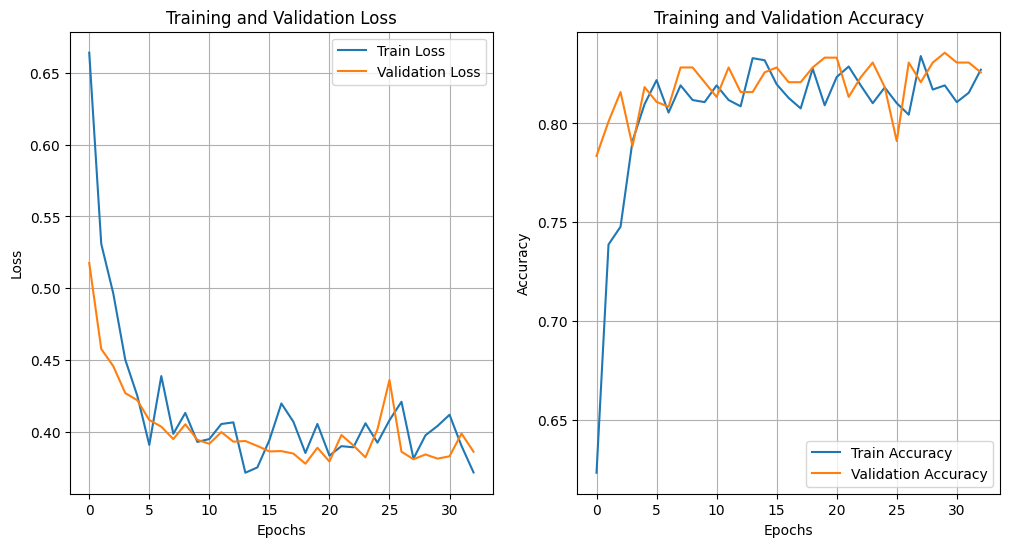

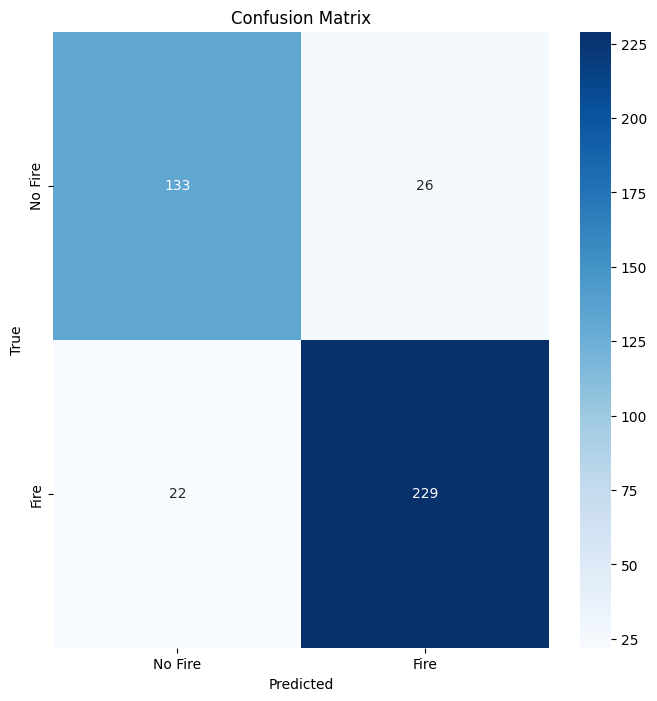

: 

In [10]:
# Training and Validation Curves
plot_training(history, f"outputs/plots/baseline/resnet18_baseline_training_curve.png")

# Confusion Matrix
plot_confusion_matrix(
    cm=metrics["confusion_matrix"],
    classes=["No Fire", "Fire"],
    output_path=f"outputs/plots/baseline/resnet18_baseline_confusion_matrix.png"
)

# Precision-Recall Curve
if "y_probs" in metrics:
    y_true = metrics["y_true"]
    y_probs = [prob[1] for prob in metrics["y_probs"]]
    plot_precision_recall(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/resnet18_baseline_precision_recall_curve.png"
    )

    # ROC Curve
    plot_roc_curve(
        y_true=y_true,
        y_scores=y_probs,
        output_path=f"outputs/plots/baseline/resnet18_baseline_roc_curve.png"
    )

print("[INFO] All results saved successfully!")